In [1]:
import numpy as py
import pandas as pd
import os
import matplotlib.pyplot as plt
import statistics as stats
from sklearn.linear_model import LinearRegression
wells = []
os.chdir(r"C:\Users\Vaishnav Bipin\Downloads\Data")
##global scope variable for the path to where all the well data is stored
#_PATH = "data/"

In [2]:
class Well:
    ##This is a well class that will hold all the properties of a well
    ##and also will be able to do relevant calculations for a given well
    
    ##Once the data is set in the constructor, please do not change the values when they are accessed.
    ##Apparently I can't prevent this in Python, but I can at least advise against it.
    
    def __init__(self, easting, northing, porosity, permeability, PR, YM, wSaturation, oSaturation, thickness, proppant,
                 pumpRate, name, RF, Pa, FVF, oilByMonth, waterByMonth):
        self.easting = easting ##easting
        self.northing = northing ##northing
        self.porosity = porosity ##porosity
        self.permeability = permeability ##permeability
        self.PR = PR ##poissons's ratio
        self.YM = YM ##young's modulus
        self.wSaturation = wSaturation ##water saturation
        self.oSaturation = oSaturation ##oil saturation
        self.thickness = thickness ##thickness
        self.proppant = proppant ##proppant weight
        self.pumpRate = pumpRate ##pumpRate
        self.name = name ##name
        self.RF = RF ##recovery factor
        self.Pa = Pa ##average pressure
        self.FVF = FVF ##formation volume factor
        self.oilByMonth = oilByMonth ##oil produced in each month
        self.waterByMonth = waterByMonth ##water produced in each month
    
    ##returns the length of the well
    def getWellLength(self):
        return self.easting.max()-self.easting.min()
    
    #returns the total oil produced by the well
    def getTotalProduction(self):
        return self.oilByMonth.sum()
    
    ##returns the oil in place for this given well
    def getOilInPlace(self):
        return ((7758 * 360 * self.thickness * self.porosity * (1 - self.wSaturation)) / self.FVF)
    
    ##returns the recoverable reserves of this well
    def getRecoverableReserves():
        return (getOriginalOilPlace() * RF)
    
    ##returns rate of initial production for this well
    def getROIP():
        pass 
    
    ##returns the life of this reservoir
    def getLR():
        pass
    
    ##returns the cumulative production of this well
    def getCP():
        pass
    
    
    
    def getFracStages(self):
        count = 0
        for rate in self.pumpRate:
            if (pd.notnull(rate)):
                count+=1
        return count
    
    def getAvgPumpRate(self):
        return self.pumpRate.mean(skipna = True)
    
    def getAvgProppant(self):
        return self.proppant.mean(skipna = True)
    
    
    ##this is the kind of functioning as a toString right now, almost no reason for it
    def getName(self):
        return self.name
    
    ##method to return oil produced in a given month
    def getOilAtMonth(self, n):
        if n > 12 or n < 1:
            ##bad
            return -1
        else:
            return self.oilByMonth[n]
    
    ##method to return water produced in a given month
    def getOilAtMonth(self, n):
        if n > 12 or n < 1:
            ##bad
            return -1
        else:
            return self.waterByMonth[n]
    
    ##method to display data for this well
    ##depth will be for getiing data at a given depth in a well. Not sure if or when I should implement this
    def displayData(self, depth = 0):
        if depth == 0:
            data = pd.read_csv(_PATH + self.name + ".csv")
        else:
            data = pd.read_csv(_PATH + self.name + ".csv")
            
        print("Displaying data for: " + self.name)
        print(data)

In [3]:
##method to take the data given, create a well object and store it in wells
def createWells():
    wellProduction = pd.read_csv("well production.csv")
    for i in range(100):
    ##for every well
        ##get all the data from the well production csv
        name = wellProduction.at[i, "well name"]
        ap = wellProduction.at[i, "average pressure (Pa)"]
        RF = wellProduction.at[i, "recovery factor"]
        FVF = wellProduction.at[i, "formation volume factor"]
        oil = wellProduction.iloc[i, 4:16] ##oil per month
        water = wellProduction.iloc[i, 16:28] ##water per month
        ##now that we have the name of the well, we can use that to access its
        ##own csv file and get that data
        wellDF = pd.read_csv(name + ".csv")
        e = wellDF["easting"]
        n = wellDF["northing"]
        p = wellDF["porosity"]
        perm = wellDF["permeability"]
        pr = wellDF["Poisson's ratio"]
        ym = wellDF["Young's Modulus"]
        ws = wellDF["water saturation"]
        os = wellDF["oil saturation"]
        thick = wellDF["thickness (ft)"]
        prop = wellDF["proppant weight (lbs)"]
        pump = wellDF["pump rate (cubic feet/min)"]
        ##create a new well
        temp = Well(e, n, p, perm, pr, ym, ws, os, thick, prop, pump, name, RF, ap, FVF, oil, water)
        ##append the new well to the list
        wells.append(temp)

In [4]:
def sparseMax(xCoords1, yCoords1, sparseness):
    newX = []
    newY = []
    for i in range(len(yCoords1)//sparseness):
        index = i*sparseness
        max = 0
        maxInd = index
        #meanX = 0
        #meanY = 0
        for j in range(sparseness):
            if(yCoords1[index+j] > max):
                max = yCoords1[index+j]
                maxInd = index+j
            #meanX += xCoords[index+j]
            #meanY += yCoords[index+j]
        #meanX /= sparseness
        #meanY /= sparseness
        newX.append(xCoords1[maxInd])
        newY.append(yCoords1[maxInd])
        #newX.append(meanX)
        #newY.append(meanY)
    return [newX, newY]

def sparseMax2(xCoords1, yCoords1, sparseness):
    newX = []
    newY = []
    xRange = max(xCoords1)-min(xCoords1)
    width = xRange/sparseness
    lastUpper = 0
    for i in range(sparseness):
        lower = min(xCoords1) + width*i
        upper = min(xCoords1) + width*(i+1)

        maxN = -1
        maxInd = -1
        for j in range(len(xCoords1)):
            if (xCoords1[j] >= lower and xCoords1[j] < upper):
                if (yCoords1[j] > maxN):
                    maxN = yCoords1[j]
                    maxInd = j
                    
        if (maxInd != -1):
            newX.append(xCoords1[maxInd])
            newY.append(yCoords1[maxInd])
        lastUpper = upper
    
    newX.append(xCoords1[len(xCoords1)-1])
    newY.append(yCoords1[len(yCoords1)-1]) 
    
    return [newX, newY]
        

def removeOutliers(xCoords, yCoords):
    newX = []
    newY = []
    q1 = py.quantile(yCoords, 0.25)
    q3 = py.quantile(yCoords, 0.75)
    iqr = q3-q1
    lower = q1 - 1.5*iqr
    upper = q3 + 1.5*iqr
    for i in range(len(yCoords)):
        if (yCoords[i] > lower and yCoords[i] < upper):
            newX.append(xCoords[i])
            newY.append(yCoords[i])
    return [newX, newY]

def getMaxLists(xCoords, yCoords):
    xCoords1 = []
    for val in xCoords:
        xCoords1.append(val)
    yCoords1 = [x for _,x in sorted(zip(xCoords,yCoords))]
    xCoords1.sort()
    #listA = removeOutliers(xCoords1, yCoords1)
    listA = [xCoords1, yCoords1]
    listZ = sparseMax2(listA[0], listA[1], 20)
    return listZ

In [5]:
createWells()

Text(0, 0.5, 'Total Production')

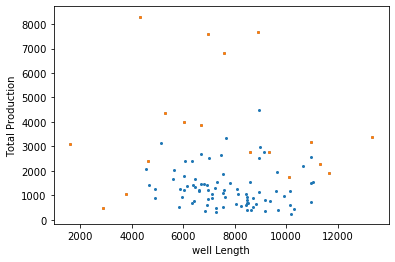

In [6]:
#Graph well length vs total production
xCoordsShow = []
yCoordsShow = []
for well in wells:
    xCoordsShow.append(well.getWellLength())
    yCoordsShow.append(well.getTotalProduction())

lengthMax = getMaxLists(xCoordsShow, yCoordsShow)

plt.scatter(xCoordsShow, yCoordsShow, s = 4)
plt.scatter(lengthMax[0], lengthMax[1], s = 4)
plt.xlabel("well Length")
plt.ylabel("Total Production")

Text(0, 0.5, 'Total Production')

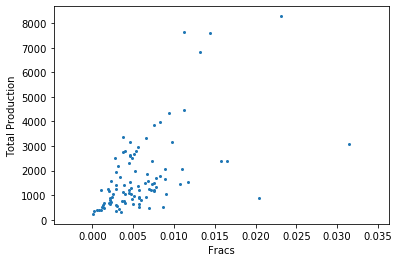

In [7]:
#Graph Frac stages vs Total Production
xCoords = []
yCoords = []
for well in wells:
    xCoords.append(well.getFracStages()/well.getWellLength())
    yCoords.append(well.getTotalProduction())

fracMax = getMaxLists(xCoords, yCoords)

plt.scatter(xCoords, yCoords, s = 4)
#plt.scatter(fracMax[0], fracMax[1], s = 4)
plt.xlabel("Fracs")
plt.ylabel("Total Production")

Text(0, 0.5, 'Total Production')

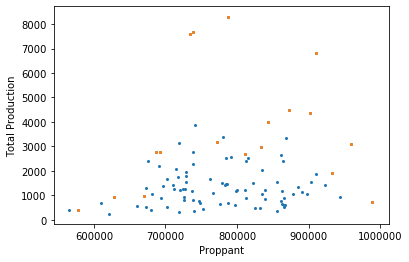

In [8]:
#Graph Proppant vs total production
xCoords = []
yCoords = []
for well in wells:
    xCoords.append(well.getAvgProppant())
    yCoords.append(well.getTotalProduction())

propMax = getMaxLists(xCoords, yCoords)

plt.scatter(xCoords, yCoords, s = 4)
plt.scatter(propMax[0], propMax[1], s = 4)
plt.xlabel("Proppant")
plt.ylabel("Total Production")

Text(0, 0.5, 'Total Production')

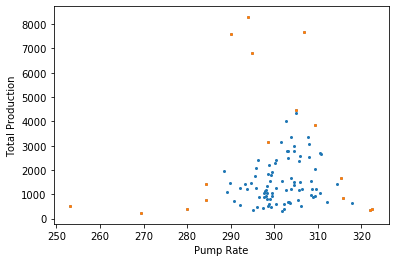

In [9]:
#Graph Pump Rate vs total production
xCoords = []
yCoords = []
for well in wells:
    xCoords.append(well.getAvgPumpRate())
    yCoords.append(well.getTotalProduction())

pumpMax = getMaxLists(xCoords, yCoords)

plt.scatter(xCoords, yCoords, s = 4)
plt.scatter(pumpMax[0], pumpMax[1], s = 4)
plt.xlabel("Pump Rate")
plt.ylabel("Total Production")

[5177.4181749  7351.87859253 2817.67852885]
Since we used the Gaussian curve as our fit, the x value at the max y value is simply the optimized x0 value : 7352


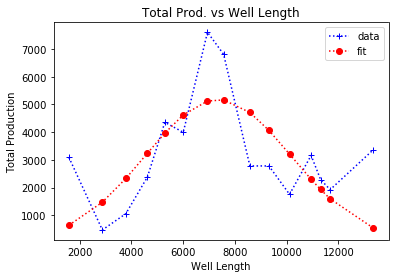

In [10]:
import pylab as plb
from scipy.optimize import curve_fit
from scipy import asarray as ar,exp
x1 = []
for val in lengthMax[0]:
    x1.append(val)
y1 = []
for val in lengthMax[1]:
    y1.append(val)
    
# only this one necessarily had to have outliers removed so that the optimizer would converge
del x1[11]
del x1[7]
del x1[3]
del y1[11]
del y1[7]
del y1[3]

x = ar(x1)
y = ar(y1)

n = len(x)                          
mean = sum(x*y)/n                   
sigma = py.sqrt(sum(y*(x-mean)**2)/sum(y))

def gaus(x,a,x0,sigma):
    return a*exp(-(x-x0)**2/(2*sigma**2))

popt,pcov = curve_fit(gaus,x,y,p0=[max(y),mean,sigma])
print(popt)
print("Since we used the Gaussian curve as our fit, the x value at the max y value is simply the optimized x0 value : 7352")
plt.plot(x,y,'b+:',label='data')
plt.plot(x,gaus(x, popt[0], popt[1], popt[2]),'ro:',label='fit')
plt.legend()
plt.title('Total Prod. vs Well Length')
plt.xlabel('Well Length')
plt.ylabel('Total Production')
plt.show()




[  5436.02613826 804422.28096613 116226.13286051]
Since we used the Gaussian curve as our fit, the x value at the max y value is simply the optimized x0 value : 804422


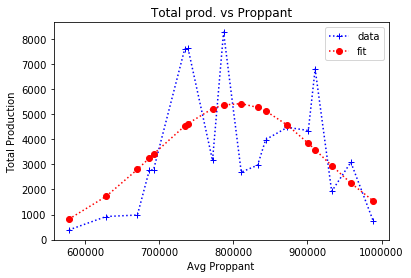

In [11]:

x1 = []
for val in propMax[0]:
    x1.append(val)
y1 = []
for val in propMax[1]:
    y1.append(val)

x = ar(x1)
y = ar(y1)

n = len(x)                          
mean = sum(x*y)/n                  
sigma = py.sqrt(sum(y*(x-mean)**2)/sum(y))        

def gaus(x,a,x0,sigma):
    return a*exp(-(x-x0)**2/(2*sigma**2))

popt,pcov = curve_fit(gaus,x,y,p0=[max(y),mean,sigma])
print(popt)
print("Since we used the Gaussian curve as our fit, the x value at the max y value is simply the optimized x0 value : 804422")
plt.plot(x,y,'b+:',label='data')
plt.plot(x,gaus(x, popt[0], popt[1], popt[2]),'ro:',label='fit')
plt.legend()
plt.title('Total prod. vs Proppant')
plt.xlabel('Avg Proppant')
plt.ylabel('Total Production')
plt.show()

[6983.18187489  298.45648342    9.83211534]
Since we used the Gaussian curve as our fit, the x value at the max y value is simply the optimized x0 value : 298


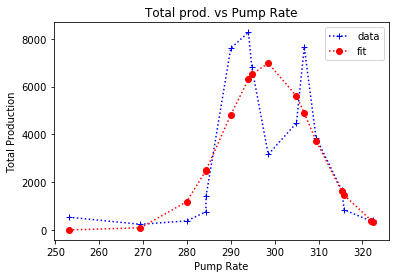

In [12]:
x1 = []
for val in pumpMax[0]:
    x1.append(val)
y1 = []
for val in pumpMax[1]:
    y1.append(val)

x = ar(x1)
y = ar(y1)

n = len(x)      
mean = sum(x*y)/n                 
sigma = py.sqrt(sum(y*(x-mean)**2)/sum(y)) 

def gaus(x,a,x0,sigma):
    return a*exp(-(x-x0)**2/(2*sigma**2))

popt,pcov = curve_fit(gaus,x,y,p0=[max(y),mean,sigma])
print(popt)
print("Since we used the Gaussian curve as our fit, the x value at the max y value is simply the optimized x0 value : 298")
plt.plot(x,y,'b+:',label='data')
plt.plot(x,gaus(x, popt[0], popt[1], popt[2]),'ro:',label='fit')
plt.legend()
plt.title('Total prod. vs Pump Rate')
plt.xlabel('Pump Rate')
plt.ylabel('Total Production')
plt.show()